In [1]:
import chardet
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../data/ks-projects.csv', encoding='latin1')

In [3]:
data

,id,name,category,subcategory,country,sex,age,start_date,end_date,currency,goal,pledged,backers,state
0,149450711,Abilities Rock,Art,Art,US,male,26,2015-11-17 19:37:50,2015-12-17 19:37:50,USD,10000.0,0.0,0,failed
1,356418410,De'VIA Elders Reunion,Art,Art,US,female,26,2016-03-21 22:18:52,2016-04-23 04:00:00,USD,7500.0,958.0,15,failed
2,412253775,Help C.B. Farr make a documentary about becomi...,Art,Art,US,female,28,2013-06-05 08:30:31,2013-07-05 08:30:31,USD,20000.0,0.0,0,failed
3,477821027,The London Aesthetifest,Art,Art,US,female,27,2014-06-24 19:49:35,2014-07-15 04:05:00,USD,7800.0,1000.0,15,failed
4,350951514,Hobo Nickels across the nation,Art,Art,US,male,22,2015-10-02 16:00:42,2015-11-01 16:00:42,USD,2621.0,392.0,6,failed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300622,285318317,MakerSpace: DEFEAT-Teaching to the test!,Technology,Makerspaces,US,male,27,2014-07-22 13:43:24,2014-08-31 05:15:00,USD,5000.0,226.0,6,failed
300623,503601672,Austin Tinkering School: the Expansion,Technology,Makerspaces,US,female,30,2014-10-27 16:27:02,2014-11-26 03:00:00,USD,20000.0,23312.0,318,successful
300624,565122152,Websmith Studio : Think; Build; Break; Play.,Technology,Makerspaces,US,female,22,2016-01-11 23:13:36,2016-02-10 23:13:36,USD,1500.0,1660.0,18,successful
300625,848305186,eTree; for all those who come to take shelter ...,Technology,Makerspaces,FR,female,35,2015-09-18 12:43:27,2015-11-17 12:43:27,EUR,300000.0,317.0,7,canceled


In [4]:
# valeurs statistic à savoir la moyenne, la mode ....

In [5]:
list_data_numeric =data[['id','age','goal','pledged','backers']].describe() 

In [6]:
list_data_numeric

,id,age,goal,pledged,backers
count,3.006270e+05,300627.000000,3.006270e+05,3.006270e+05,300627.000000
mean,4.992343e+08,27.620044,4.637402e+04,8.239740e+03,98.235581
std,2.888665e+08,7.206378,1.137581e+06,8.688740e+04,890.415481
min,4.701000e+03,18.000000,1.000000e-02,0.000000e+00,0.000000
25%,2.493480e+08,23.000000,2.000000e+03,3.000000e+01,2.000000
50%,4.987463e+08,27.000000,5.000000e+03,6.010000e+02,12.000000
75%,7.497511e+08,30.000000,1.500000e+04,3.825000e+03,54.000000
max,9.999995e+08,70.000000,1.000000e+08,2.033899e+07,219382.000000


In [7]:
list_data_cat =data[['name','category','subcategory', 'country', 'sex', 'start_date', 'end_date','currency','state']].describe() 

In [8]:
list_data_cat

,name,category,subcategory,country,sex,start_date,end_date,currency,state
count,300623,300627,300627,296830,291719,300627,300627,300627,300627
unique,298680,15,158,18,2,300179,274233,10,6
top,New EP/Music Development,Film & Video,Product Design,US,female,1970-01-01 01:00:00,2012-01-01 05:59:00,USD,failed
freq,41,55032,15443,242613,147517,7,47,245351,156301


In [9]:
# correlation entre les attibuts

In [10]:
numerical_columns = ['age', 'goal', 'pledged', 'backers']

# Calcule de la corrélation de Pearson pour les valeurs numeriques
correlation_matrix = data[numerical_columns].corr()

In [11]:
correlation_matrix

,age,goal,pledged,backers
age,1.000000,0.090230,0.049922,0.040736
goal,0.090230,1.000000,0.007016,0.005660
pledged,0.049922,0.007016,1.000000,0.757726
backers,0.040736,0.005660,0.757726,1.000000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

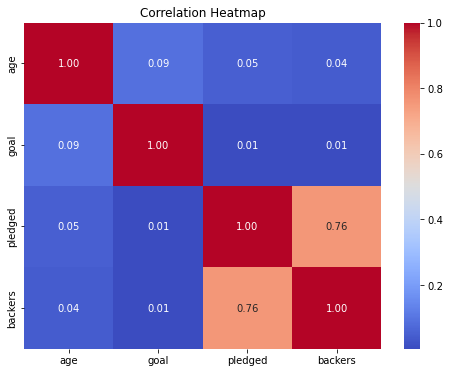

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [14]:
categorical_columns = ['name', 'category', 'subcategory', 'country', 'sex', 'currency', 'state']

# tableau de contingence pour les attributs categorielles
contingency_table = pd.crosstab(data['state'], data['category'])


In [15]:
contingency_table

category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
canceled,1758,628,603,128,2705,1923,4842,1785,4402,408,2760,820,2849,3311,522
failed,11368,3156,4153,1033,10874,10433,28203,12709,11795,2444,18192,5463,18706,14578,3194
live,308,161,162,49,565,367,559,281,490,81,512,114,478,669,130
successful,9130,4017,1490,2008,6965,3891,20488,4942,8203,818,20740,2710,9433,4483,5738
suspended,67,19,53,12,168,104,86,118,163,45,117,43,46,276,21
undefined,0,0,0,1,2,3,854,0,1,0,2234,1,462,3,1


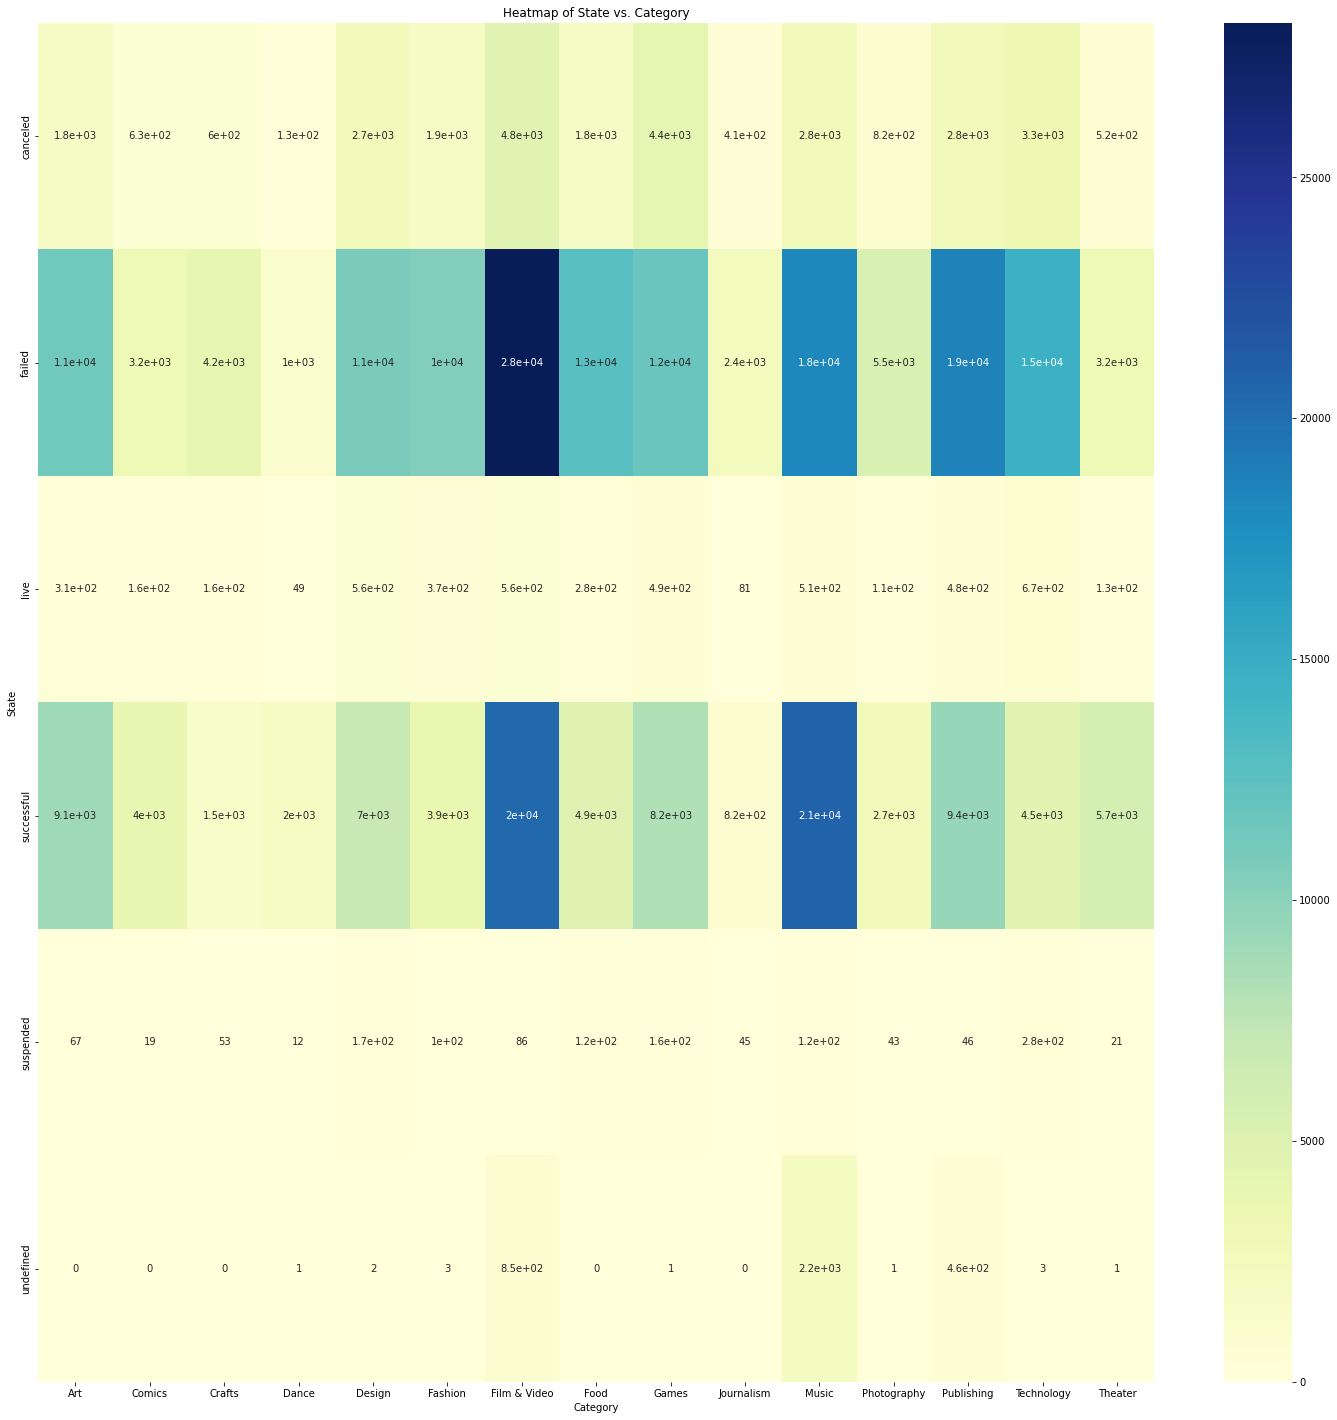

In [16]:
plt.figure(figsize=(25, 25))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.xlabel('Category')
plt.ylabel('State')
plt.title('Heatmap of State vs. Category')
plt.show()

In [17]:
from scipy.stats import chi2_contingency

In [18]:
attribute1 = 'category'
attribute2 = 'state'
contingency_table = pd.crosstab(data[attribute1], data[attribute2])
chi2, _, _, _ = chi2_contingency(contingency_table)


In [19]:
n = contingency_table.sum().sum()
contingency_coefficient = np.sqrt(chi2 / (n * min(contingency_table.shape) - 1))

print(f'Coefficient de contingence entre {attribute1} et {attribute2}: {contingency_coefficient:.4f}')

Coefficient de contingence entre category et state: 0.1185


In [20]:
contingency_matrix = np.zeros((len(categorical_columns), len(categorical_columns)))

In [21]:
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        attribute1 = categorical_columns[i]
        attribute2 = categorical_columns[j]
        
        # Créer un tableau de contingence
        contingency_table = pd.crosstab(data[attribute1], data[attribute2])
        
        # Effectuer un test du chi-carré
        chi2, _, _, _ = chi2_contingency(contingency_table)
        
        # Calculer le coefficient de contingence
        n = contingency_table.sum().sum()
        contingency_coefficient = np.sqrt(chi2 / (n * min(contingency_table.shape) - 1))
        
        # Stocker le coefficient de contingence dans la matrice
        contingency_matrix[i, j] = contingency_coefficient


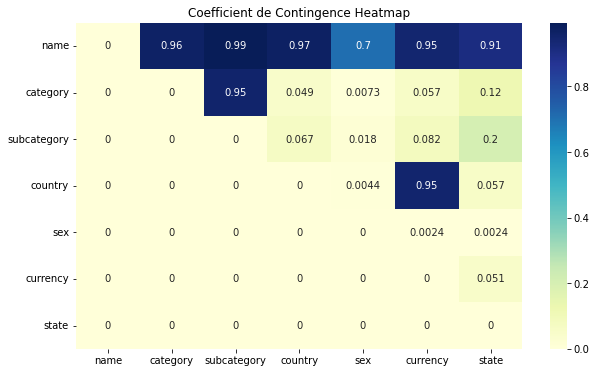

In [22]:
contingency_df = pd.DataFrame(contingency_matrix, columns=categorical_columns, index=categorical_columns)

# Tracer une carte de chaleur
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_df, annot=True, cmap='YlGnBu')
plt.title('Coefficient de Contingence Heatmap')
plt.show()

In [23]:
# nettoyage

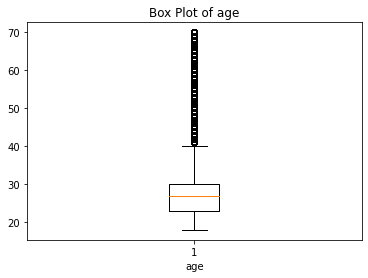

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.boxplot(data['age'])
plt.xlabel('age')
plt.title('Box Plot of age')

# Afficher le graphique
plt.show()


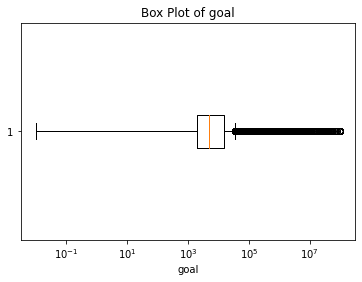

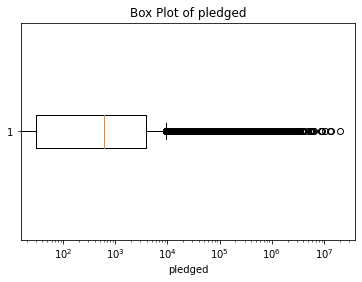

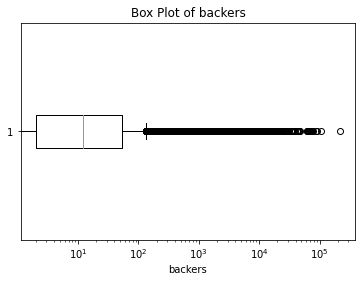

In [25]:
columns = ['goal', 'pledged', 'backers']
for x in columns :
    plt.boxplot(x=data[x], vert=False)
    plt.xscale('log')
    plt.xlabel(x)
    plt.title(f'Box Plot of {x}')

    # Afficher le graphique
    plt.show()